# Case study - 80 C - predict oxygen stoichiometry of 2.2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["figure.figsize"] = (16, 8)  #set default figure size
import os
import sys
from PEMFC_project import _samplings , _equivalent_circuits, _reconstruct_Nyquist_plot,_data_summery 
import time
import seaborn as sns
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, DotProduct, ConstantKernel as C
import seaborn as sns

def optimizer(obj_func, initial_theta, bounds):
    import scipy.optimize 
    theta_opt, func_min, _ = scipy.optimize.fmin_l_bfgs_b(obj_func, initial_theta, bounds=bounds,maxiter=15000)
    
    return theta_opt, func_min

In [2]:
df_p_sel2 = pd.read_csv('Data/df_p_sel2.csv',header=0)
df_zf2 = pd.read_csv('Data/df_z_sel2.csv',header=0)

In [3]:
freq = _equivalent_circuits.read_freq()

In [40]:
import pickle

with open('Models/gpc_smote_3.pkl','rb') as f:
     gpc= pickle.load(f)
        
eis_train = pd.read_csv('Data/x_smote_enn_train_1.csv',header=0,index_col=None)

from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()
scaler.fit(eis_train)

C:\Users\mero_\anaconda3\Lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator _BinaryGaussianProcessClassifierLaplace from version 0.23.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\mero_\anaconda3\Lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.23.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\mero_\anaconda3\Lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator OneVsRestClassifier from version 0.23.2 when using version 1.2.2. This might lead to breaking code or inv

MinMaxScaler()

# Detect the noise data

In [42]:
eis_21 = pd.read_excel('Data/testing/20.11.21F.xlsx',sheet_name=0, header=0,index_col=0)
o2_stoi_21 = pd.read_excel('Data/testing/20.11.21F.xlsx',sheet_name=2, header=0,index_col=0)
df_eis_21 = eis_21.copy()
df_eis_21['stoi'] = o2_stoi_21['O2 stoi'].values
df_eis_80C = df_eis_21.copy()
params_80C = _equivalent_circuits.circuits_components_params(eis_21)
stois = df_eis_80C.iloc[:,-1].values
y_lim = {1.4:10800, 1.5:11600,1.6:12200, 1.8:13700, 2.0:15100, 2.2:16500, 2.5:18700, 3.0:22200}
params_80C['stoi'] = df_eis_80C.iloc[:,-1].values
params_80C['Jlim'] = [y_lim[x] for x in params_80C['stoi']]
params_80C['(Rct/Jlim)^2'] = (params_80C['Rct']/params_80C['Jlim'])**2

df_z_80C = pd.read_excel('Data/smote_80C_2.xlsx',sheet_name=0, header=0,index_col=0)
df_z = df_z_80C

(0.0, 1.0)

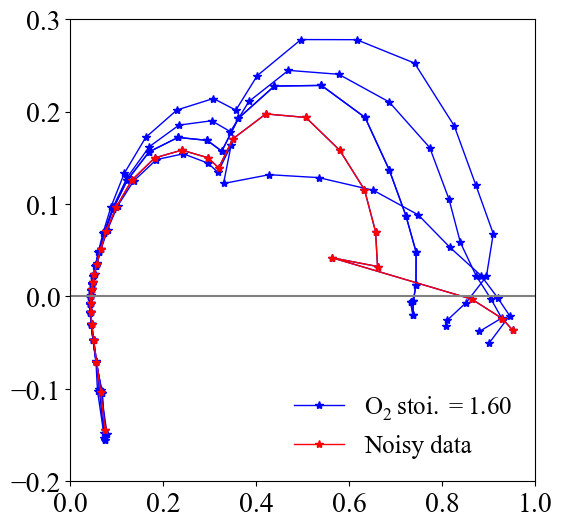

In [6]:

plt.figure(figsize=(6,6))
ind = np.where(df_eis_80C['stoi']==1.6)[0]

for j in ind:
    plt.plot(df_eis_80C.iloc[j,:31]*28.3, df_eis_80C.iloc[j,31:-1]*28.3,'*-', c='blue', linewidth=1, label=None)
plt.plot(df_eis_80C.iloc[j,:31]*28.3, df_eis_80C.iloc[j,31:-1]*28.3,'*-', c='blue', linewidth=1, label='$\mathregular{O_2{\/}stoi.= 1.60}$')
plt.plot(df_eis_80C.iloc[3,:31]*28.3, df_eis_80C.iloc[3,31:-1]*28.3,'*-', c='r', linewidth=1, label='Noisy data')
plt.plot(np.linspace(-0.02,1.02,5), np.zeros(5),'-',c='grey')
plt.xticks(np.linspace(0,1,6),fontsize=20)#
plt.yticks(np.linspace(-0.2,0.3,6),fontsize=20)
#plt.ylabel('-Z"/Ω $\mathregular{m^2}$', fontsize=20)
#plt.xlabel('Z${\'}$/Ω $\mathregular{m^2}$', fontsize=20)
plt.legend(markerscale=1,frameon=False, fontsize=18)
#plt.ylim([-2.1,5])
plt.xlim([0,1])


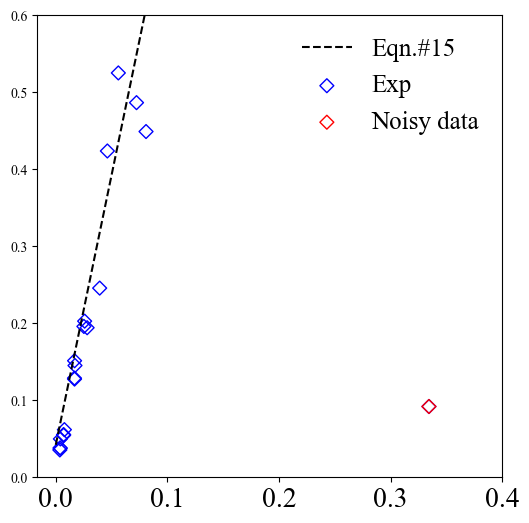

In [7]:
plt.figure(figsize=(6,6))

plt.plot(np.linspace(-1e-12,8e-2, 100), 
                    7.0042*np.linspace(-1e-12,8e-2, 100)+0.0421,
                    '--', c='k', label = 'Eqn.#15')

plt.scatter(params_80C['(Rct/Jlim)^2']*(28.3e4)**2, params_80C['Rt']*28.3,s=50,
                marker='D', edgecolor='b',facecolors='none',  label='Exp')

plt.scatter(params_80C.loc[3, '(Rct/Jlim)^2']*(28.3e4)**2, params_80C.loc[3, 'Rt']*28.3,s=50,
                marker='D', edgecolor='r',facecolors='none',  label='Noisy data')

plt.xticks(np.linspace(0,4e-1,5),fontsize=20)
#plt.yticks(np.linspace(0,7,8),fontsize=20)
plt.ylim(0,0.6)
#plt.xscale('log')
plt.legend(markerscale=1,frameon=False, fontsize=18)
plt.rcParams.update({'font.size': 20})
#plt.ylabel('$\mathregular{R_{t}}$', fontsize=20)
#plt.xlabel('$\mathregular{(R_{ct}/i_{lim})^2}$', fontsize=20)
#plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0), useLocale=False, useMathText=True)

## Simulate the scenario in which the noise data can affect the identification of oxygen stoichiometry

### Model 1 - Train the basic model based on the raw data

In [43]:
### Load the trained Model 1

with open('Models/testing/gprm_80C.pkl','rb') as f:
     model= pickle.load(f)

C:\Users\mero_\anaconda3\Lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator GaussianProcessRegressor from version 0.23.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [9]:
t_start = time.time()
stois =[1.6, 1.8, 2.0,2.5, 3.0, 2.2]

X_test_stoi = np.array([np.ones(len(freq))*stoi for stoi in stois ])
X_test_freq = np.array([freq for i in range(len(stois))])
df_X_test = pd.DataFrame()
df_X_test['stoi'] = X_test_stoi.ravel()
df_X_test['freq'] = X_test_freq.ravel()

y_pred = model.predict(df_X_test)
df_y_pred = pd.DataFrame(y_pred, columns=['Re','img']) #scaler.inverse_transform

df_y_pred['stoi'] = df_X_test['stoi']
df_y_pred['freq'] = df_X_test['freq']
t_end = time.time()

print('time consumption: ', t_end-t_start, 's')


size = y_pred.shape[0]//31

df_y_pred_eis = pd.DataFrame(index=np.arange(size),columns=np.arange(62))
params = pd.DataFrame(index=range(size),columns=['L','Rm','Q','phi','Rct','Cdl','Rt'])
#y_pred2 = scaler.inverse_transform(y_pred)
for i in range(size):
    z_re = np.array([y_pred[j][0] for j in range(i*31, (i+1)*31)])
    z_img = np.array([y_pred[j][1] for j in range(i*31, (i+1)*31)])
    df_y_pred_eis.iloc[i,:31] = z_re
    df_y_pred_eis.iloc[i,31:] = z_img

zf1 = scaler.transform(df_y_pred_eis)
y_zf1 = gpc.predict(zf1)
target = pd.Series(y_zf1).replace([0, 1, 2, 3, 4, 5, 6],[1.4, 1.5,  1.8, 2.0, 2.2, 2.5, 3.0])

df_eis = pd.DataFrame(index=stois, columns=df_y_pred_eis.columns)
for i in range(len(stois)) :
    df_eis.loc[stois[i]] = np.r_[df_y_pred.loc[i*31:30+31*i,'Re'], df_y_pred.loc[i*31:30+31*i,'img']]
param_sim= _equivalent_circuits.circuits_components_params(df_eis.astype('float'))
param_sim['stoi'] = stois
param_sim

C:\Users\mero_\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GaussianProcessRegressor was fitted without feature names
  warnings.warn(
C:\Users\mero_\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


time consumption:  0.023968219757080078 s


,L,Rm,Q,phi,Rct,Cdl,Rt,stoi
0,0.0,0.00181,0.853002,0.917895,0.011286,6.132243,0.015607,1.6
1,0.0,0.001889,0.670262,0.935104,0.008247,8.829913,0.007397,1.8
2,0.0,0.001872,0.628588,0.945626,0.006936,10.269905,0.004883,2.0
3,0.0,0.001925,0.557688,0.939475,0.005586,19.128257,0.002014,2.5
4,0.0,0.001882,0.546945,0.949341,0.004908,22.036871,0.001426,3.0
5,0.0,0.002652,0.970044,0.901491,0.005865,14.217283,0.004273,2.2


(-0.005, 0.02)

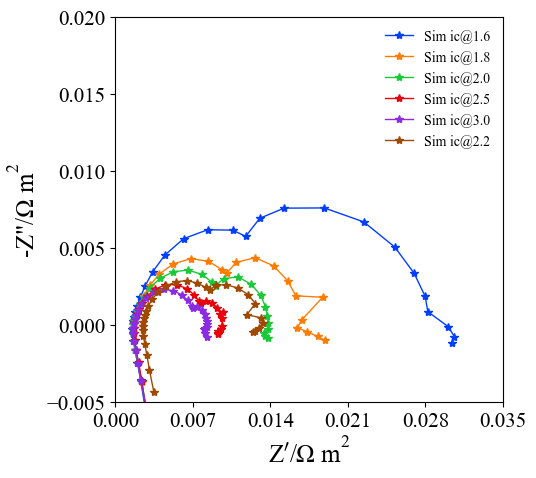

In [10]:
plt.figure(figsize=(5,5))
palette = sns.color_palette("bright", df_y_pred.shape[0])
for i in range(len(stois)):
    if i == 0 : label = 'Sim'
    else: label = None
    plt.plot(df_y_pred.loc[i*31:30+31*i,'Re'], df_y_pred.loc[i*31:30+31*i,'img'],'*-', linewidth=1, label='Sim ic@%0.1f'%stois[i],  c=palette[i])

plt.xticks(np.linspace(0,3.5e-2,6),fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('-Z"/Ω $\mathregular{m^2}$', fontsize=18)
plt.xlabel('Z${\'}$/Ω $\mathregular{m^2}$', fontsize=18)
plt.legend(markerscale=1,frameon=False, fontsize=10)
plt.ylim([-5e-3,2e-2])

In [11]:
### Recode the result of the predicted EIS of oxgyen stoichiometry of 2.2 

result = pd.DataFrame(index=range(0,4), columns=range(len(freq)*2))
z_re = np.array([y_pred[j][0] for j in range(i*31, (i+1)*31)])
z_img = np.array([y_pred[j][1] for j in range(i*31, (i+1)*31)])
result.iloc[0,:31] = z_re
result.iloc[0,31:] = z_img
result

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,0.003465,0.003065,0.002843,0.002654,0.002537,0.002482,0.002477,0.002506,0.002562,0.002649,...,0.002599,0.002378,0.001941,0.001369,0.000644,0.000441,0.000092,-0.000227,-0.00041,-0.000501
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Model 2 - Train the basic model based on data under the SMTOE treatment 

In [44]:
df_smote_tr = pd.read_excel('Data/smote_80C_2.xlsx',sheet_name=0, header=0,index_col=0)

In [45]:

import pickle
# load gpc model
with open('Models/testing/gprm_80C_smote.pkl','rb') as f:
     model= pickle.load(f)

C:\Users\mero_\anaconda3\Lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator GaussianProcessRegressor from version 0.23.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [15]:

t_start = time.time()
stois =[1.6, 1.8, 2.0,2.5, 3.0, 2.2]

X_test_stoi = np.array([np.ones(len(freq))*stoi for stoi in stois ])
X_test_freq = np.array([freq for i in range(len(stois))])
df_X_test = pd.DataFrame()
df_X_test['stoi'] = X_test_stoi.ravel()
df_X_test['freq'] = X_test_freq.ravel()

y_pred = model.predict(df_X_test)
df_y_pred = pd.DataFrame(y_pred, columns=['Re','img']) #scaler.inverse_transform

df_y_pred['stoi'] = df_X_test['stoi']
df_y_pred['freq'] = df_X_test['freq']
t_end = time.time()

print('time consumption: ', t_end-t_start, 's')

z_re = np.array([y_pred[j][0] for j in range(i*31, (i+1)*31)])
z_img = np.array([y_pred[j][1] for j in range(i*31, (i+1)*31)])
result.iloc[1,:31] = z_re
result.iloc[1,31:] = z_img

time consumption:  0.08148837089538574 s


C:\Users\mero_\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GaussianProcessRegressor was fitted without feature names
  warnings.warn(


(-0.005, 0.02)

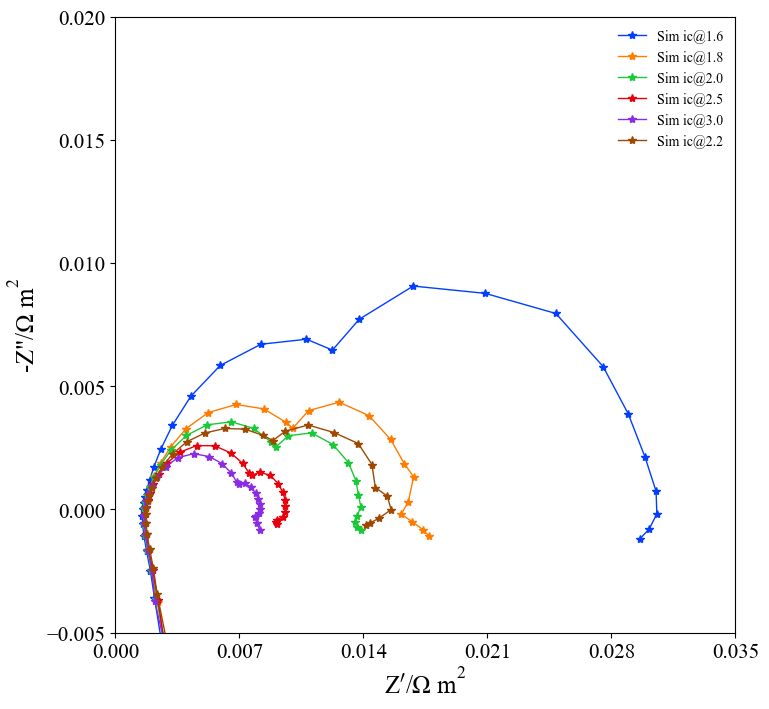

In [16]:
plt.figure(figsize=(8,8))
palette = sns.color_palette("bright", df_y_pred.shape[0])
for i in range(len(stois)):
    if i == 0 : label = 'Sim'
    else: label = None
    plt.plot(df_y_pred.loc[i*31:30+31*i,'Re'], df_y_pred.loc[i*31:30+31*i,'img'],'*-', linewidth=1, label='Sim ic@%0.1f'%stois[i],  c=palette[i])

plt.xticks(np.linspace(0,3.5e-2,6),fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('-Z"/Ω $\mathregular{m^2}$', fontsize=18)
plt.xlabel('Z${\'}$/Ω $\mathregular{m^2}$', fontsize=18)
plt.legend(markerscale=1,frameon=False, fontsize=10)
plt.ylim([-5e-3,2e-2])

### Model 3 - Train the model based on the raw data under the SMTOE treatment and the synthetic data

Text(0.5, 0, '$\\mathregular{(R_{ct}/I_{lim})^2}$')

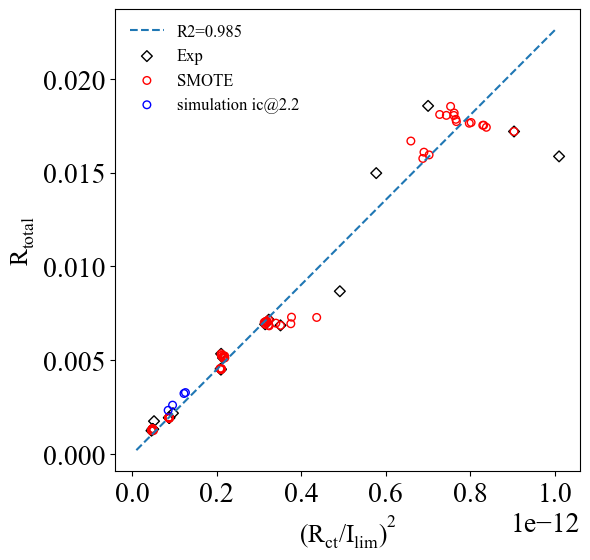

In [17]:
df_p_80C = pd.read_excel('smote_80C_2.xlsx',sheet_name=1, header=0,index_col=0)

plt.figure(figsize=(6,6))

plt.plot(np.linspace(1e-14,1e-12, 50), 
                     2.26e10*np.linspace(1e-14,1e-12, 50)-1e-5,
                    '--', label = 'R2=0.985')

params_80C.drop(params_80C.index[3], axis=0, inplace=True)
plt.scatter(params_80C['(Rct/Jlim)^2'], params_80C['Rt'],s=30,
                marker='D', edgecolor='k',facecolors='none',  label='Exp')
plt.scatter(df_p_80C['(Rct/Jlim)^2'], df_p_80C['Rt'],s=30,
                marker='o', edgecolor='r',facecolors='none',  label='SMOTE')

plt.scatter(df_p_sel2.loc[[528, 542,608, 610], '(Rct/Jlim)^2'], 
            df_p_sel2.loc[[528, 542,608, 610], 'Rt'],s=30,
                        marker='o', edgecolor='b',facecolors='none',label='simulation ic@2.2' )

plt.legend(markerscale=1,frameon=False, fontsize=12)
plt.rcParams.update({'font.size': 15})
plt.ylabel('$\mathregular{R_{total}}$', fontsize=18)
plt.xlabel('$\mathregular{(R_{ct}/I_{lim})^2}$', fontsize=18)

In [18]:
zf = pd.DataFrame(df_zf2.iloc[[528, 542,608, 610],:].values,columns=df_eis_80C.columns)
zf['stoi']=2.2
df_z = pd.concat([df_smote_tr,zf])

In [46]:
with open('Models/testing/gprm_80C_smote_2.pkl','rb') as f:
    gprm_80C = pickle.load(f)

In [22]:
import time 
t_start = time.time()
stois =[1.6, 1.8, 2.0,2.5, 3.0, 2.2]

X_test_stoi = np.array([np.ones(len(freq))*stoi for stoi in stois ])
X_test_freq = np.array([freq for i in range(len(stois))])
df_X_test = pd.DataFrame()
df_X_test['stoi'] = X_test_stoi.ravel()
df_X_test['freq'] = X_test_freq.ravel()

y_pred = gprm_80C.predict(df_X_test)
df_y_pred = pd.DataFrame(y_pred, columns=['Re','img']) #scaler.inverse_transform

df_y_pred['stoi'] = df_X_test['stoi']
df_y_pred['freq'] = df_X_test['freq']
t_end = time.time()

print('time consumption: ', t_end-t_start, 's')
z_re = np.array([y_pred[j][0] for j in range(i*31, (i+1)*31)])
z_img = np.array([y_pred[j][1] for j in range(i*31, (i+1)*31)])
result.iloc[2,:31] = z_re
result.iloc[2,31:] = z_img

time consumption:  0.0823981761932373 s


C:\Users\mero_\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GaussianProcessRegressor was fitted without feature names
  warnings.warn(


(-0.005, 0.02)

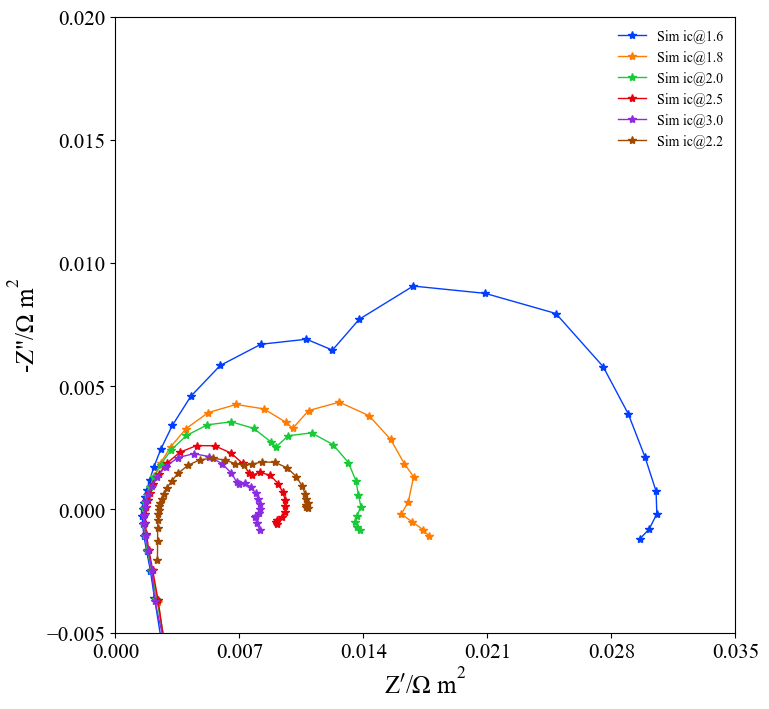

In [23]:
plt.figure(figsize=(8,8))
palette = sns.color_palette("bright", df_y_pred.shape[0])
for i in range(len(stois)):
    if i == 0 : label = 'Sim'
    else: label = None
    plt.plot(df_y_pred.loc[i*31:30+31*i,'Re'], df_y_pred.loc[i*31:30+31*i,'img'],'*-', linewidth=1, label='Sim ic@%0.1f'%stois[i],  c=palette[i])

plt.xticks(np.linspace(0,3.5e-2,6),fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('-Z"/Ω $\mathregular{m^2}$', fontsize=18)
plt.xlabel('Z${\'}$/Ω $\mathregular{m^2}$', fontsize=18)
plt.legend(markerscale=1,frameon=False, fontsize=10)
plt.ylim([-5e-3,2e-2])

### Model 4 - Train the model based on the raw data and synthetic data

Text(0.5, 0, '$\\mathregular{(R_{ct}/I_{lim})^2}$')

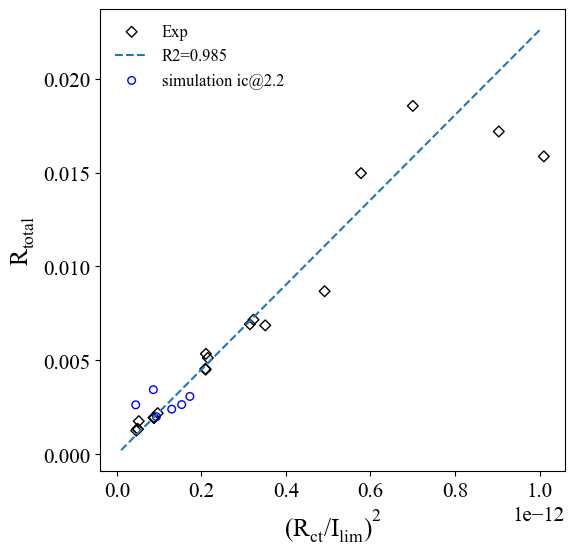

In [24]:
plt.figure(figsize=(6,6))


#params_80C.drop(params_80C.index[3], axis=0, inplace=True)
plt.scatter(params_80C['(Rct/Jlim)^2'], params_80C['Rt'],s=30,
                marker='D', edgecolor='k',facecolors='none',  label='Exp')
#plt.scatter(df_p_80C['(Rct/Jlim)^2'], df_p_80C['Rt'],s=30,
#                marker='o', edgecolor='r',facecolors='none',  label='SMOTE')
plt.plot(np.linspace(1e-14,1e-12, 50), 
                     2.26e10*np.linspace(1e-14,1e-12, 50)-1e-5,
                    '--', label = 'R2=0.985')
plt.scatter(df_p_sel2.loc[[550, 551, 552, 553, 554, 555], '(Rct/Jlim)^2'], 
            df_p_sel2.loc[[550, 551, 552, 553, 554, 555], 'Rt'],s=30,
                        marker='o', edgecolor='b',facecolors='none',label='simulation ic@2.2' )

plt.legend(markerscale=1,frameon=False, fontsize=12)
plt.rcParams.update({'font.size': 15})
plt.ylabel('$\mathregular{R_{total}}$', fontsize=18)
plt.xlabel('$\mathregular{(R_{ct}/I_{lim})^2}$', fontsize=18)

In [25]:
zf = pd.DataFrame(df_zf2.iloc[[550, 551, 552, 553, 554, 555],:].values,columns=df_eis_80C.columns)
zf['stoi']=2.2
df_z = pd.concat([df_eis_80C,zf])

In [26]:
t_start = time.time()
X_train_stoi = np.array([np.ones(len(freq))*stoi for stoi in df_z['stoi'].values ])
X_train_freq = np.array([freq for i in range(len(df_z['stoi'].values))])
df_X_train = pd.DataFrame()
df_X_train['stoi'] = X_train_stoi.ravel()
df_X_train['freq'] = X_train_freq.ravel()

Z_re_train = df_z.iloc[:,:31].values
Z_img_train = df_z.iloc[:,31:-1].values
df_y_train = pd.DataFrame()
df_y_train['Re'] =  Z_re_train.ravel()
df_y_train['img'] =  Z_img_train.ravel()



#kernel =DotProduct(sigma_0=0, sigma_0_bounds='fixed')+WhiteKernel(0.001)
kernel = C(1.0) * RBF(1,(1e-5, 1e5))
model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=20,alpha=1e-3, normalize_y=True, random_state=0, optimizer='fmin_l_bfgs_b')
model.fit(df_X_train, df_y_train)

t_end = time.time()
print('time consumption: ', t_end-t_start, 's')

time consumption:  61.56680941581726 s


In [27]:
import time 
t_start = time.time()
stois =[1.6, 1.8, 2.0,2.5, 3.0,2.2]

X_test_stoi = np.array([np.ones(len(freq))*stoi for stoi in stois ])
X_test_freq = np.array([freq for i in range(len(stois))])
df_X_test = pd.DataFrame()
df_X_test['stoi'] = X_test_stoi.ravel()
df_X_test['freq'] = X_test_freq.ravel()

y_pred = model.predict(df_X_test)
df_y_pred = pd.DataFrame(y_pred, columns=['Re','img']) #scaler.inverse_transform

df_y_pred['stoi'] = df_X_test['stoi']
df_y_pred['freq'] = df_X_test['freq']
t_end = time.time()

print('time consumption: ', t_end-t_start, 's')
z_re = np.array([y_pred[j][0] for j in range(i*31, (i+1)*31)])
z_img = np.array([y_pred[j][1] for j in range(i*31, (i+1)*31)])
result.iloc[3,:31] = z_re
result.iloc[3,31:] = z_img

time consumption:  0.03490853309631348 s


(-0.005, 0.02)

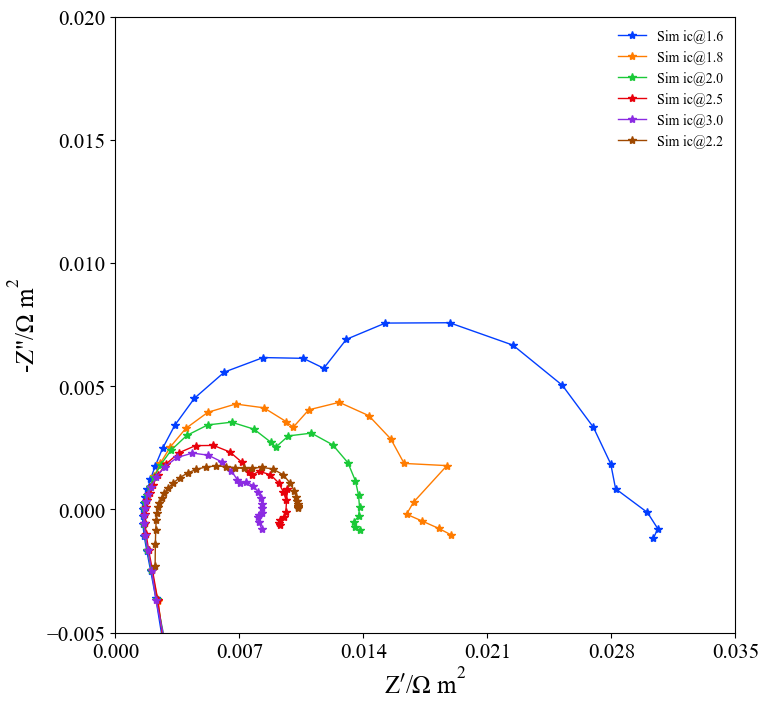

In [34]:
plt.figure(figsize=(8,8))
palette = sns.color_palette("bright", df_y_pred.shape[0])
for i in range(len(stois)):
    if i == 0 : label = 'Sim'
    else: label = None
    plt.plot(df_y_pred.loc[i*31:30+31*i,'Re'], df_y_pred.loc[i*31:30+31*i,'img'],'*-', linewidth=1, label='Sim ic@%0.1f'%stois[i],  c=palette[i])
    #if stois[i] in df_m_17.index:
    #    ind = np.where(df_eis_17.iloc[:,-1]==stois[i])[0]
    #    plt.scatter(df_eis_17.iloc[ind,:31], 
    #                df_eis_17.iloc[ind, 31:-1],edgecolor='k', label='Exp ic@%0.1f'%stois[i], 
     #                   s=20, marker='D', c=np.array(palette[i]).reshape(1,-1))
            
plt.xticks(np.linspace(0,3.5e-2,6),fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('-Z"/Ω $\mathregular{m^2}$', fontsize=18)
plt.xlabel('Z${\'}$/Ω $\mathregular{m^2}$', fontsize=18)
plt.legend(markerscale=1,frameon=False, fontsize=10)
plt.ylim([-5e-3,2e-2])

In [35]:
size = y_pred.shape[0]//31

df_y_pred_eis = pd.DataFrame(index=np.arange(size),columns=np.arange(62))
params = pd.DataFrame(index=range(size),columns=['L','Rm','Q','phi','Rct','Cdl','Rt'])
#y_pred2 = scaler.inverse_transform(y_pred)
for i in range(size):
    z_re = np.array([y_pred[j][0] for j in range(i*31, (i+1)*31)])
    z_img = np.array([y_pred[j][1] for j in range(i*31, (i+1)*31)])
    df_y_pred_eis.iloc[i,:31] = z_re
    df_y_pred_eis.iloc[i,31:] = z_img
zf1 = scaler.transform(df_y_pred_eis)
y_zf1 = gpc.predict(zf1)
target = pd.Series(y_zf1).replace([0, 1, 2, 3, 4, 5, 6],[1.4, 1.5,  1.8, 2.0, 2.2, 2.5, 3.0])

C:\Users\mero_\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [36]:
df_eis = pd.DataFrame(index=stois, columns=df_y_pred_eis.columns)
for i in range(len(stois)) :
    df_eis.loc[stois[i]] = np.r_[df_y_pred.loc[i*31:30+31*i,'Re'], df_y_pred.loc[i*31:30+31*i,'img']]
param_sim= _equivalent_circuits.circuits_components_params(df_eis.astype('float'))
param_sim['stoi'] = stois
param_sim

,L,Rm,Q,phi,Rct,Cdl,Rt,stoi
0,0.0,0.00181,0.853123,0.917868,0.011286,6.132487,0.015607,1.6
1,0.0,0.001889,0.669875,0.935211,0.008247,8.827553,0.007398,1.8
2,0.0,0.001872,0.629112,0.945459,0.006937,10.274024,0.004882,2.0
3,0.0,0.001925,0.55779,0.939429,0.005586,19.131683,0.002013,2.5
4,0.0,0.001882,0.54693,0.949343,0.004908,22.036615,0.001426,3.0
5,0.0,0.002176,3.331133,0.634119,0.006088,22.882552,0.00211,2.2


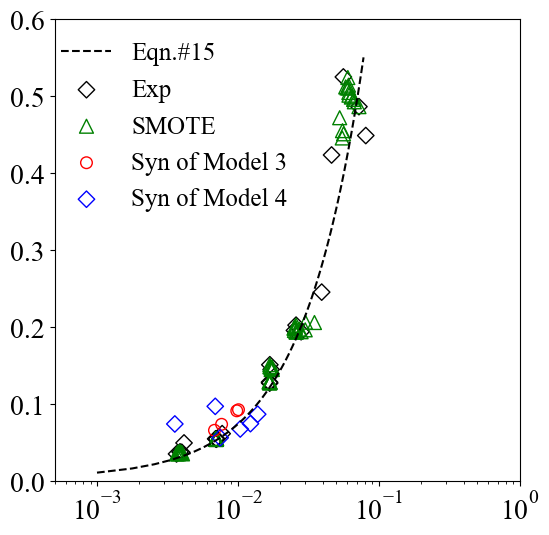

In [37]:
# training data summary
plt.figure(figsize=(6,6))

plt.plot(np.linspace(1e-3,7.8e-2, 100), 
                    7.0042*np.linspace(1e-3,7.8e-2, 100)+0.00421,
                    '--', c='k', label = 'Eqn.#15')
plt.scatter(params_80C['(Rct/Jlim)^2']*28.3e4**2, params_80C['Rt']*28.3,s=70,
                marker='D', edgecolor='k',facecolors='none',  label='Exp')
plt.scatter(df_p_80C['(Rct/Jlim)^2']*28.3e4**2, df_p_80C['Rt']*28.3,s=100,
                marker='^', edgecolor='g',facecolors='none',  label='SMOTE')

plt.scatter(df_p_sel2.loc[[528, 542,608, 610], '(Rct/Jlim)^2']*28.3e4**2, 
            df_p_sel2.loc[[528, 542,608, 610], 'Rt']*28.3,s=70,
                        marker='o', edgecolor='r',facecolors='none',label='Syn of Model 3' )
plt.scatter(df_p_sel2.loc[[550, 551, 552, 553, 554, 555], '(Rct/Jlim)^2']*28.3e4**2, 
            df_p_sel2.loc[[550, 551, 552, 553, 554, 555], 'Rt']*28.3,s=70,
                        marker='D', edgecolor='b',facecolors='none',label='Syn of Model 4' )


plt.rcParams.update({'font.size': 20})
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)
#plt.ylabel('$\mathregular{R_{t}}$', fontsize=25)
plt.xscale('log')
plt.xlim(5e-4,1)
plt.ylim(0,0.6)
#plt.xlabel('$\mathregular{(R_{ct}/i_{lim})^2}$', fontsize=20)
plt.legend(markerscale=1,frameon=False, fontsize=18,bbox_to_anchor=(0.55, 1.00))

In [38]:
result

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,0.003465,0.003065,0.002843,0.002654,0.002537,0.002482,0.002477,0.002506,0.002562,0.002649,...,0.002599,0.002378,0.001941,0.001369,0.000644,0.000441,0.000092,-0.000227,-0.00041,-0.000501
1,0.00284,0.002359,0.002144,0.001927,0.00179,0.001724,0.00172,0.001753,0.001816,0.001912,...,0.003425,0.003115,0.002673,0.00182,0.000888,0.000535,-0.000011,-0.000368,-0.000555,-0.000651
2,0.002374,0.00238,0.002388,0.0024,0.002417,0.002442,0.002479,0.002534,0.002615,0.002734,...,0.001907,0.001687,0.001329,0.000954,0.000641,0.000424,0.000267,0.000174,0.000112,0.00007
3,0.002241,0.002256,0.002277,0.002306,0.002347,0.002406,0.002488,0.002604,0.002765,0.002985,...,0.001645,0.001413,0.001073,0.000751,0.000503,0.000332,0.00022,0.000143,0.000093,0.000063


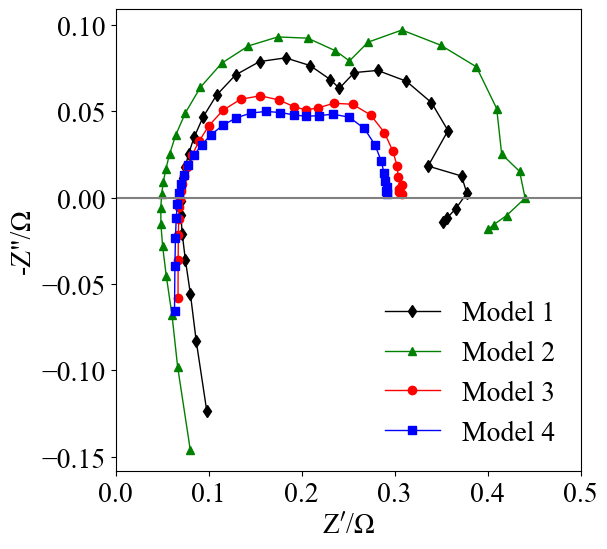

In [39]:
colors = ['k','g','r','b']
markers = ['d','^','o','s']
labels = ['Model 1', 'Model 2', 'Model 3', 'Model 4']
plt.figure(figsize=(6,6))
palette = sns.color_palette("bright", df_y_pred.shape[0])
for i in range(4):
    plt.plot(result.iloc[i,:31]*28.3, result.iloc[i,31:]*28.3,marker=markers[i],linewidth=1, label=labels[i],  c=colors[i])

plt.xticks(np.linspace(0,0.5,6),fontsize=20)
plt.yticks(fontsize=20)#np.linspace(-5e-3,4e-3,5)
plt.ylabel('-Z"/Ω', fontsize=20)
plt.xlabel('Z${\'}$/Ω', fontsize=20)
plt.legend(markerscale=1,frameon=False, fontsize=20)
#plt.ylim([-2,1.5])
plt.xlim([0,0.5])
plt.plot(np.linspace(0,0.5,5), np.zeros(5),'-',c='grey')